In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
Nobjs = 500
np.random.seed(1)
x, y = np.random.multivariate_normal(mean, cov, Nobjs).T
#Add manual outlier
x[0]=3.3
y[0]=3.3
X=np.array([x,y]).T

In [3]:
granularity = 30

# Heat map data 
xx, yy = np.meshgrid(np.linspace(-5., 5., granularity), np.linspace(-5., 5, granularity))

In [4]:
f = plt.figure(figsize=(40,51))

def plot_heatmap(heatmap_data, subplot, title): 

    ax1 = f.add_subplot(subplot)
    levels = np.linspace(0,1,50, endpoint=True)
    v = np.linspace(0, 1, 12, endpoint=True)
    v = np.around(v, decimals=1)
    CS = ax1.contourf(xx, yy, heatmap_data, levels, cmap=plt.cm.YlOrRd)
    cbar = plt.colorbar(CS, ticks=v)
    cbar.ax.set_ylabel('Anomaly score', fontsize = 27)
    cbar.ax.tick_params(labelsize=24)
    ax1.set_xlabel("x", fontsize = 24)
    ax1.set_ylabel("y", fontsize = 24)
    plt.tick_params(labelsize=30)
    plt.scatter(x,y,s=15,c='None',edgecolor='k')
    plt.axis("equal")
    plt.title(title,  fontsize=35)

<Figure size 2880x3672 with 0 Axes>

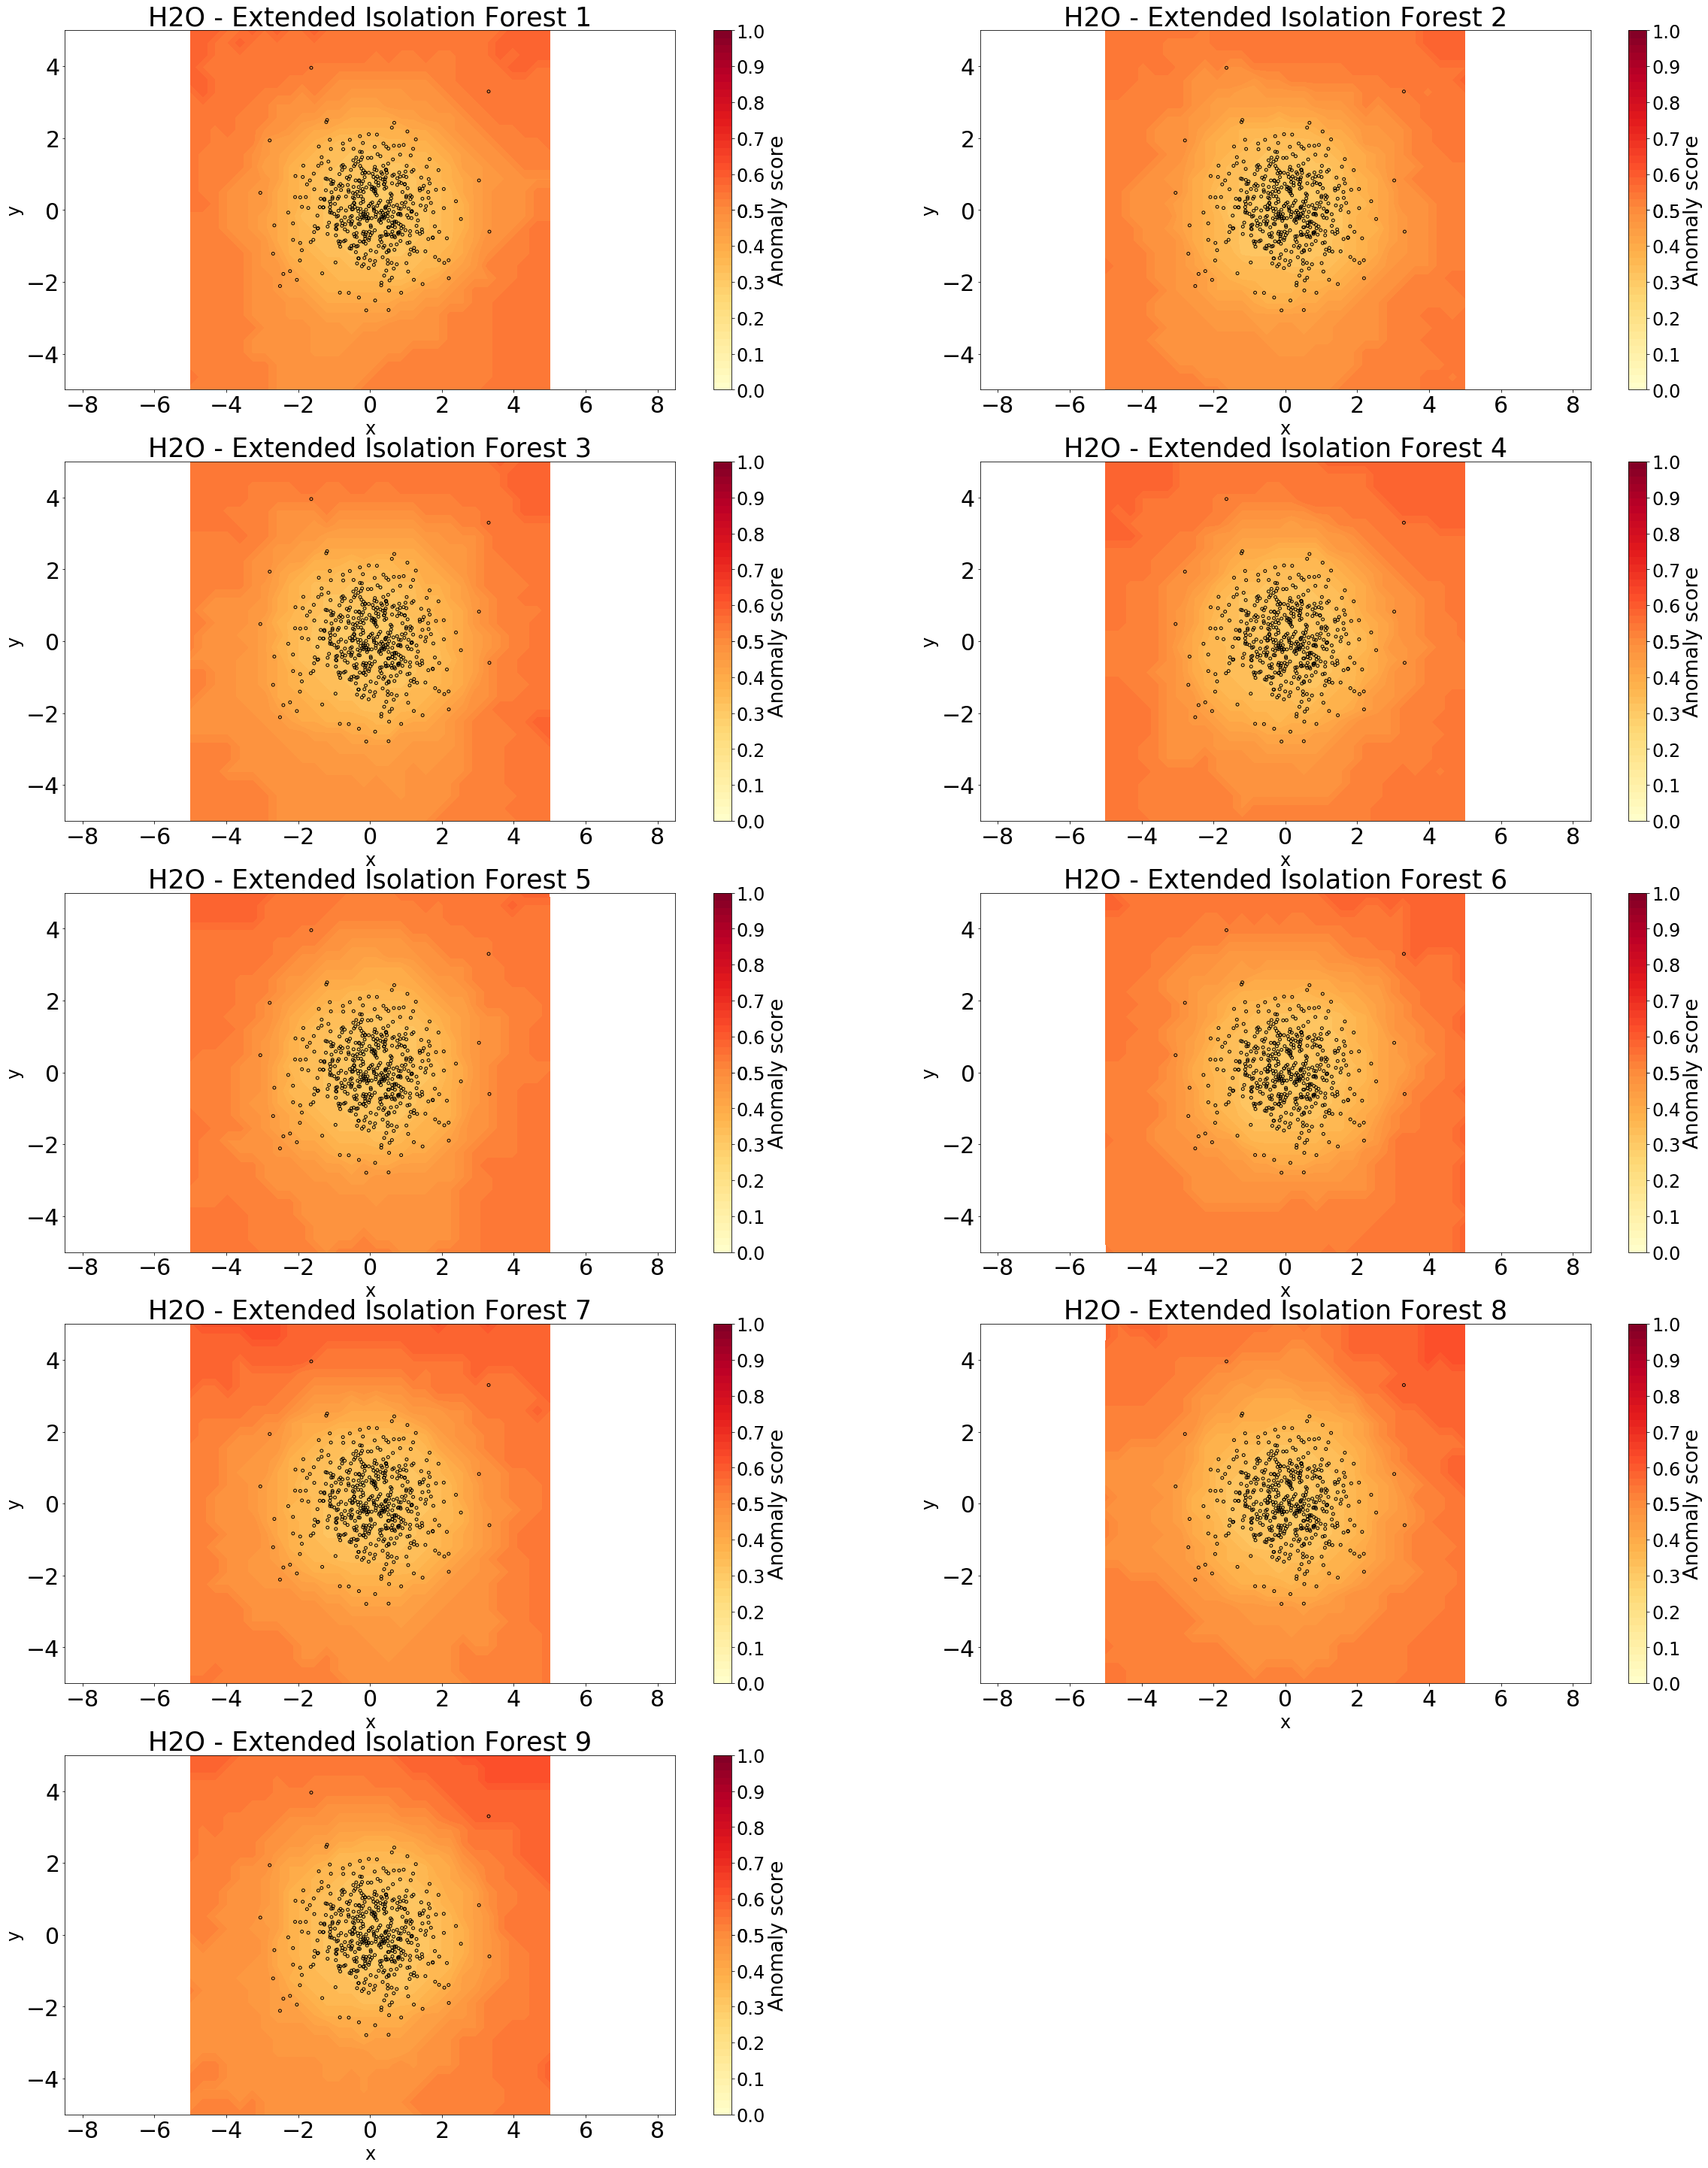

In [5]:
f = plt.figure(figsize=(40,51))

for i in range(9):
    # H2O EIF
    h2o_anomaly_score_eif = pd.read_csv(f"eif-data/eif{i}.csv")
    heatmap_h2o_eif = np.array(h2o_anomaly_score_eif["anomaly_score"]).reshape(xx.shape)
    
    plot_heatmap(heatmap_h2o_eif, f"52{i+1}", f"H2O - Extended Isolation Forest {i+1}")
    
plt.show()
    
    